## Init

!conda install -c anaconda pandas-profiling -y

!conda install -c anaconda pandas -y

In [1]:
import pandas as pd
import os
import pandas_profiling
import numpy as np

In [2]:
#\\src\\git_cloned\\graph_dataset_final\\
#"/src/git_cloned/graph_dataset_final/'
#"\src\git_cloned\graph_dataset_final\'
PATH = 'package'

## Read data

files = list(os.walk(PATH))[0][2]
files

In [3]:
files = ['categories.csv',
 'products.csv',
 'products_to_categories.csv',
 'products_to_review.csv',
 'products_to_similar_items.csv']
files

['categories.csv',
 'products.csv',
 'products_to_categories.csv',
 'products_to_review.csv',
 'products_to_similar_items.csv']

In [4]:
pd.__version__

'0.20.3'

In [5]:
df_categ = pd.read_csv('/'.join((PATH, files[0])))
df_products = pd.read_csv('/'.join((PATH, files[1])), escapechar='\\', quotechar='"')
df_products_to_categories = pd.read_csv('/'.join((PATH, files[2])))
df_products_to_rev = pd.read_csv('/'.join((PATH, files[3])))
df_products_to_sim = pd.read_csv('/'.join((PATH, files[4])))

## EDA

### df_categ

In [6]:
df_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 6 columns):
depthFromParent       49732 non-null int64
highestParentFlag     49732 non-null bool
id                    49732 non-null int64
lowestChildFlag       49732 non-null bool
name                  49721 non-null object
parentCategoryItem    49732 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 1.6+ MB


In [7]:
df_categ.highestParentFlag = df_categ.highestParentFlag.astype(int) 
df_categ.lowestChildFlag = df_categ.lowestChildFlag.astype(int)

In [8]:
pandas_profiling.ProfileReport(df_categ)

Number of variables,6
Number of observations,49732
Total Missing (%),0.0%
Total size in memory,2.3 MiB
Average record size in memory,48.0 B
Numeric,5
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,11


### df_prod

In [9]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548552 entries, 0 to 548551
Data columns (total 6 columns):
asin            548552 non-null object
discontinued    548552 non-null bool
group           542684 non-null object
id              548552 non-null int64
salesrank       548552 non-null int64
title           542684 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 21.4+ MB


In [10]:
df_products.discontinued = df_products.discontinued.astype(int)

In [11]:
pandas_profiling.ProfileReport(df_products)

### df_products_to_categories

In [12]:
df_products_to_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519781 entries, 0 to 519780
Data columns (total 2 columns):
id              519781 non-null int64
category_ids    519781 non-null object
dtypes: int64(1), object(1)
memory usage: 7.9+ MB


In [13]:
pandas_profiling.ProfileReport(df_products_to_categories)

Number of variables,2
Number of observations,519781
Total Missing (%),0.0%
Total size in memory,7.9 MiB
Average record size in memory,16.0 B
Numeric,1
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,290171


### df_products_to_rev

In [14]:
df_products_to_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593244 entries, 0 to 7593243
Data columns (total 6 columns):
productId    int64
date         object
customer     object
helpful      int64
rating       int64
votes        int64
dtypes: int64(4), object(2)
memory usage: 347.6+ MB


In [15]:
df_products_to_rev.head()

,productId,date,customer,helpful,rating,votes
0,1,2000-07-28,A2JW67OY8U6HHK,9,5,10
1,1,2003-12-14,A2VE83MZF98ITY,5,5,6
2,2,2001-12-16,A11NCO6YTE4BTJ,4,5,5
3,2,2002-01-07,A9CQ3PLRNIR83,5,4,5
4,2,2002-01-24,A13SG9ACZ9O5IM,8,5,8


In [16]:
df_products_to_rev.describe()

,productId,helpful,rating,votes
count,7.593244e+06,7.593244e+06,7.593244e+06,7.593244e+06
mean,2.827273e+05,3.794829e+00,4.178372e+00,5.859097e+00
std,1.661600e+05,1.097852e+01,1.250068e+00,1.478179e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.367350e+05,0.000000e+00,4.000000e+00,1.000000e+00
50%,2.775610e+05,1.000000e+00,5.000000e+00,2.000000e+00
75%,4.291470e+05,4.000000e+00,5.000000e+00,6.000000e+00
max,5.485510e+05,7.453000e+03,5.000000e+00,7.669000e+03


### df_products_to_sim

In [17]:
df_products_to_sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542684 entries, 0 to 542683
Data columns (total 2 columns):
id                  542684 non-null int64
similarItemASINs    379093 non-null object
dtypes: int64(1), object(1)
memory usage: 8.3+ MB


In [18]:
pandas_profiling.ProfileReport(df_products_to_sim)

Number of variables,2
Number of observations,542684
Total Missing (%),15.1%
Total size in memory,8.3 MiB
Average record size in memory,16.0 B
Numeric,1
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,542684


<IPython.core.display.Javascript object>


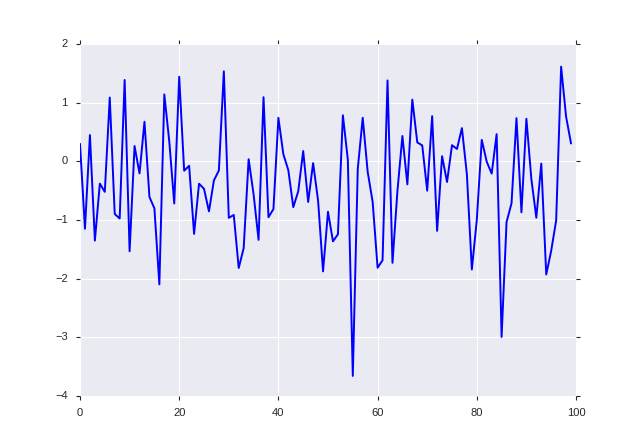

In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

In [ ]:
#{categ_id: {product_id: ([(custom_id, date)], set(categ_ids))}}
df_categ = pd.read_csv('/'.join((PATH, files[0])))
df_products = pd.read_csv('/'.join((PATH, files[1])), escapechar='\\', quotechar='"')
df_products_to_categories = pd.read_csv('/'.join((PATH, files[2])))
df_products_to_rev = pd.read_csv('/'.join((PATH, files[3])))
df_products_to_sim = pd.read_csv('/'.join((PATH, files[4])))

df_products_to_rev.loc['customer']
df_products_to_rev.loc['date']
df_products_to_rev.loc['productId']

df_products_to_categories.loc['id'] where
df_products_to_categories.loc['category_ids']


In [69]:
#product_id, custom_id, date, categ_ids = (1,2,'823',[6,3,4])
categs

{1: ([('A2JW67OY8U6HHK', datetime.date(2000, 7, 28)),
   ('A2VE83MZF98ITY', datetime.date(2003, 12, 14))],
  {22, 1000, 12290, 12360, 12368, 12370, 283155}),
 2: ([('A11NCO6YTE4BTJ', datetime.date(2001, 12, 16))],
  {22, 1000, 12472, 12484, 12486, 283155})}

In [96]:
datetime.datetime(2016,1,1) - datetime.datetime(2000,1,1) #+ datetime.timedelta(1000)

datetime.timedelta(5844)

In [33]:
categs = {}

In [26]:
import datetime

def refine_date(str_date):
    args = [int(x) for x in str_date.split('-')]
    return datetime.date(*args)

In [34]:
i = 0
for item in df_products_to_rev.values:    
    i += 1
    #print(item)
    product_id, custom_id = (item[0],item[2])
    date = refine_date(item[1])    
    if categs.get(product_id):
        categs[product_id][0].append((custom_id, date))
    else:
        categ_ids = [int(x) for x in df_products_to_categories[df_products_to_categories['id']==product_id]['category_ids']\
.values[0].split(';')]
        categs[product_id] = ([(custom_id, date)], set(categ_ids))
    if i%100000==0:
        print(i)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [36]:
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
save_obj(categs, 'categs')
#categs = load_obj('categs')

In [122]:
categs = load_obj('categs')

In [157]:
for key in categs.keys():
    print(key)
    break

1


In [155]:
#categ_id_2_len = {}
for key, value in categs.items():
    print(value)
    print(len(value[0]))
    break
    #categ_id_2_len[key] = len(value[0])

([('A2JW67OY8U6HHK', datetime.date(2000, 7, 28)), ('A2VE83MZF98ITY', datetime.date(2003, 12, 14))], {12290, 1000, 12360, 12368, 12370, 283155, 22})
2


In [128]:
import operator
[x[0] for x in sorted(categ_id_2_len.items(),key=operator.itemgetter(1))[:5]]

[3, 4, 11, 20, 26]

In [110]:
dates = [refine_date(date_) for date_ in df_products_to_rev['date']]
start_date, fin_date = min(dates), max(dates)
print(start_date, fin_date)

1970-12-30 2005-07-09


In [113]:
start_date + delta_step*20

datetime.date(1994, 1, 4)

In [111]:
n_points = 30
delta_step = (fin_date - start_date) / n_points

In [125]:
def sum_less_t_for_categ(categ_id, datetime_t):
    n = 0    
    #datetime_t = datetime.datetime.combine(datetime_t, datetime.time.min)
    for product_records in categs.values():
        if categ_id in product_records[1]:
            for review in product_records[0]:
                if review[1] < datetime_t:
                    n += 1
            #arr = np.array(product_records[0])[:,1]
            #arr = np.array(arr, dtype='datetime64[s]')
            #arr.sort()
            #n = sum(arr < datetime_t)
    return n

sum_less_t_for_categ(12368, datetime.date(2000, 1, 16))

80

In [213]:
categ_ids2num_prod = {}

for i, categ_id in enumerate(df_categ['id'].values):
    n = 0
    for product_records in categs.values():
        if categ_id in product_records[1]:
            n += 1
    categ_ids2num_prod[categ_id] = n
    if i > 200:
        break
#sorted(categ_ids2num_prod.items(),key=operator.itemgetter(1))[-10:]
best_categ_ids = [x[0] for x in sorted(categ_ids2num_prod.items(),key=operator.itemgetter(1))[-10:]]

In [214]:
best_categ_names = [str(df_categ[df_categ['id']==id_]['name'].values[0]) for id_ in best_categ_ids]

In [215]:
best_categ_names

['Fairy Tales',
 'Historical',
 'Astronomy & Space',
 'Faure, Gabriel',
 'Ballet & Dance',
 'History',
 'British & Irish',
 'Feminist Theory',
 'General',
 'By Original Language']

In [165]:
df_categ['id'].values.shape

(49732,)

In [216]:
shift = 20
start_date2 = start_date + delta_step * shift 
categ_id_2_n = {}
dates_x = []
for x in range(n_points - shift):
    start_date2 += delta_step
    dates_x.append(start_date2)
    for categ_id in best_categ_ids:#enumerate(df_categ['id'].unique()):        
        categ_id_2_n[(x,categ_id)] = sum_less_t_for_categ(categ_id, start_date2)
        #if i%10000==0 and i!=0:
        #    print(i)
        #    #break

In [217]:
categ_id_2_n

{(0, 2162): 0,
 (0, 3210): 0,
 (0, 3959): 0,
 (0, 11332): 0,
 (0, 17427): 0,
 (0, 18509): 0,
 (0, 169338): 0,
 (0, 169888): 0,
 (0, 193685): 0,
 (0, 297517): 0,
 (1, 2162): 0,
 (1, 3210): 0,
 (1, 3959): 7,
 (1, 11332): 1,
 (1, 17427): 1,
 (1, 18509): 0,
 (1, 169338): 0,
 (1, 169888): 0,
 (1, 193685): 0,
 (1, 297517): 2,
 (2, 2162): 47,
 (2, 3210): 4,
 (2, 3959): 184,
 (2, 11332): 23,
 (2, 17427): 17,
 (2, 18509): 0,
 (2, 169338): 0,
 (2, 169888): 3,
 (2, 193685): 3,
 (2, 297517): 13,
 (3, 2162): 272,
 (3, 3210): 29,
 (3, 3959): 937,
 (3, 11332): 132,
 (3, 17427): 129,
 (3, 18509): 5,
 (3, 169338): 6,
 (3, 169888): 10,
 (3, 193685): 31,
 (3, 297517): 55,
 (4, 2162): 954,
 (4, 3210): 85,
 (4, 3959): 3284,
 (4, 11332): 804,
 (4, 17427): 461,
 (4, 18509): 93,
 (4, 169338): 284,
 (4, 169888): 255,
 (4, 193685): 2244,
 (4, 297517): 159,
 (5, 2162): 2042,
 (5, 3210): 231,
 (5, 3959): 5694,
 (5, 11332): 1724,
 (5, 17427): 902,
 (5, 18509): 279,
 (5, 169338): 719,
 (5, 169888): 726,
 (5, 193685

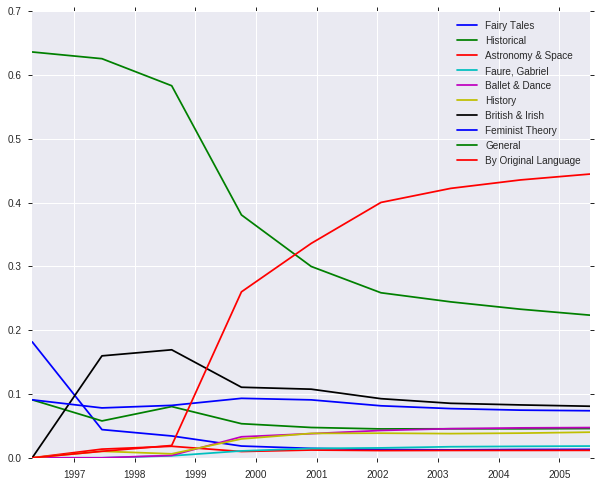

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(10,8))

norm_coefs = []
for t in range(1,10):
    norm_coefs.append(sum([categ_id_2_n[(t,categ_id)]
                           for categ_id in best_categ_ids]))
                 
for i, categ_id in enumerate(best_categ_ids):
    categ_y = [categ_id_2_n[(t,categ_id)]/norm_coefs[t-1]
               for t in range(1,10)]
    plt.plot(dates_x[1:], categ_y, label=str(best_categ_names[i]))
plt.legend(loc='upper right')
plt.show()

In [80]:
del categ_id_2_n

dates = [refine_date(date) for date in df_products_to_rev.date.values]
product_ids = df_products_to_rev.productId.values
custom_ids = df_products_to_rev.customer.values
#dates = df_products_to_rev.date.values

del dates, product_ids, custom_ids

categ_ids = []
for product_id in product_ids:
    categ_ids_record = []
    for x in df_products_to_categories[df_products_to_categories['id']==product_id]['category_ids']\
.values[0].split(';'):
        categ_ids_record.append(int(x))
    categ_ids.append(categ_ids_record)
#categ_ids